## Notebook 2C: Some of many other useful things
## This notebook is provided as a chance to introduce a couple of other python packages that you might find useful:
    - Geopandas for handling geographical data within a dataframe
    - Geoviews and cartopy for plotting geographical data (part of the holoviz collection)
    - Faker for creating random ~fake data with certain characteristics 
    
    and also some use of Numpy and Pandas packages

In [1]:
#%conda install descartes cartopy faker geopandas geoviews
#%conda install geopandas 

In [2]:
import faker as fk
import pandas as pd
import numpy as np



## let's create a fake data generator (for right here in _Great?_ Britain)

In [3]:
# let's create a fake data generator for here
fake_demo =fk.Faker('en_GB')

In [4]:
# and have a look at some of the options for generating data
fake_demo.name()

'Abbie Roberts'

In [5]:
fake_demo.name_male()

'John Richards'

In [6]:
fake_demo.location_on_land()

('58.04254', '65.27258', 'Tavda', 'RU', 'Asia/Yekaterinburg')

In [7]:
fake_demo.date_time_this_decade()

datetime.datetime(2020, 7, 14, 7, 56, 59)

In [8]:
fake_demo.iso8601()

'1993-03-23T07:30:35'

In [9]:
def CreateNewFakeRow(num=1):
        out = [{"name":fake_demo.name(),
                "Locale":fake_demo.location_on_land(),
                "Country":fake_demo.country(),  # will not match LatLong
                "email":fake_demo.email(),
                "bs":fake_demo.bs(),
                "randomdata":np.random.randint(1,1000)} for x in range(num)]
        return out

In [10]:
df_fake = pd.DataFrame(CreateNewFakeRow(1000))

df_fake.head()

name                                             Locale  \
0   Dr. Donald McKenzie  (58.23583, 92.48278, Lesosibirsk, RU, Asia/Kra...   
1    Mr. Danny Williams     (37.65639, 126.835, Goyang-si, KR, Asia/Seoul)   
2         Marion Walker    (3.11988, 35.59642, Lodwar, KE, Africa/Nairobi)   
3  Alex Simmons-Roberts  (-34.64167, -60.47389, Chacabuco, AR, America/...   
4          Annette Khan  (34.25807, -88.70464, Tupelo, US, America/Chic...   

            Country                    email  \
0          Dominica  masongordon@yahoo.co.uk   
1         Mauritius         epatel@yahoo.com   
2             Congo     joanne68@hotmail.com   
3          Suriname      zharvey@gibbons.com   
4  Saint Barthelemy       eallen@hotmail.com   

                                   bs  randomdata  
0  cultivate out-of-the-box e-markets         693  
1            drive ubiquitous vortals         787  
2    synergize vertical methodologies         973  
3           unleash revolutionary ROI         365  
4   visualize plug-and-play e-tailers          71

***
Our fake DataFrame contains a name, country and coordinates (not related to each other), some random numbers, an e-mail address, timestamp, a paragraph of random text, and a 'bs'  (short for business, but then this is all 'bs')
***

In [11]:
#Split LatLong column up
df_fake =df_fake.join(pd.DataFrame(df_fake.Locale.values.tolist()
                                   , columns=['Lat', 'Long', 'Place', '2_letter_country', 'region']))

df_fake

name                                             Locale  \
0     Dr. Donald McKenzie  (58.23583, 92.48278, Lesosibirsk, RU, Asia/Kra...   
1      Mr. Danny Williams     (37.65639, 126.835, Goyang-si, KR, Asia/Seoul)   
2           Marion Walker    (3.11988, 35.59642, Lodwar, KE, Africa/Nairobi)   
3    Alex Simmons-Roberts  (-34.64167, -60.47389, Chacabuco, AR, America/...   
4            Annette Khan  (34.25807, -88.70464, Tupelo, US, America/Chic...   
..                    ...                                                ...   
995  Ms. Rosemary Hopkins     (42.28639, 18.84, Budva, ME, Europe/Podgorica)   
996       Mitchell Wilson  (33.98154, -81.23621, Lexington, US, America/N...   
997   Denise Moore-Morgan  (29.53885, -95.44744, Fresno, US, America/Chic...   
998          Kathleen May       (46.7055, 38.2739, Yeysk, RU, Europe/Moscow)   
999           Jenna Watts  (18.00747, -76.78319, New Kingston, JM, Americ...   

                              Country                       email  \
0                            Dominica     masongordon@yahoo.co.uk   
1                           Mauritius            epatel@yahoo.com   
2                               Congo        joanne68@hotmail.com   
3                            Suriname         zharvey@gibbons.com   
4                    Saint Barthelemy          eallen@hotmail.com   
..                                ...                         ...   
995  Lao People's Democratic Republic     jandrews@davis-gill.com   
996          Central African Republic        rsmith@hotmail.co.uk   
997      United States Virgin Islands  graycharlotte@matthews.biz   
998                           Jamaica   hursttimothy@thompson.com   
999                              Peru         ibaker@taylor.co.uk   

                                         bs  randomdata        Lat       Long  \
0        cultivate out-of-the-box e-markets         693   58.23583   92.48278   
1                  drive ubiquitous vortals         787   37.65639    126.835   
2          synergize vertical methodologies         973    3.11988   35.59642   
3                 unleash revolutionary ROI         365  -34.64167  -60.47389   
4         visualize plug-and-play e-tailers          71   34.25807  -88.70464   
..                                      ...         ...        ...        ...   
995        facilitate revolutionary systems          67   42.28639      18.84   
996    re-intermediate virtual partnerships         144   33.98154  -81.23621   
997       utilize distributed relationships           5   29.53885  -95.44744   
998          orchestrate viral deliverables         861    46.7055    38.2739   
999  envisioneer next-generation e-commerce         136   18.00747  -76.78319   

            Place 2_letter_country                          region  
0     Lesosibirsk               RU                Asia/Krasnoyarsk  
1       Goyang-si               KR                      Asia/Seoul  
2          Lodwar               KE                  Africa/Nairobi  
3       Chacabuco               AR  America/Argentina/Buenos_Aires  
4          Tupelo               US                 America/Chicago  
..            ...              ...                             ...  
995         Budva               ME                Europe/Podgorica  
996     Lexington               US                America/New_York  
997        Fresno               US                 America/Chicago  
998         Yeysk               RU                   Europe/Moscow  
999  New Kingston               JM                 America/Jamaica  

[1000 rows x 11 columns]

we can split columns into new columns to help useage later if needed

In [12]:
fake_density =df_fake.Country.value_counts()

fake_density

Congo                          13
Korea                          13
Chile                          10
Timor-Leste                    10
Turks and Caicos Islands        9
                               ..
Sri Lanka                       1
Netherlands Antilles            1
Montserrat                      1
Falkland Islands (Malvinas)     1
Macedonia                       1
Name: Country, Length: 239, dtype: int64


## Next we are going to import some of the choices we have for exploring geographical data

In [13]:
import geopandas as gpd
import matplotlib
%matplotlib inline

In [14]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [15]:
# we can import a base map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [16]:
# this data is a DataFrame
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

<AxesSubplot:>

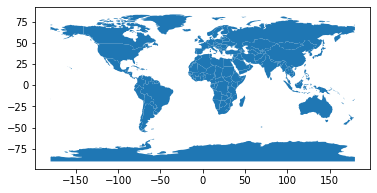

In [17]:
#and as a plot
world.plot()


In [18]:
#We can combine our fake data with this world geometry information

fake_demo_mapped = world.join(fake_density, on='name',how='inner')

fake_demo_mapped.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   
5   18556698           Asia                Kazakhstan    KAZ    460700.0   

                                            geometry  Country  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...        4  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...        5  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...        4  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...        3  
5  POLYGON ((87.35997 49.21498, 86.59878 48.54918...        4

<AxesSubplot:>

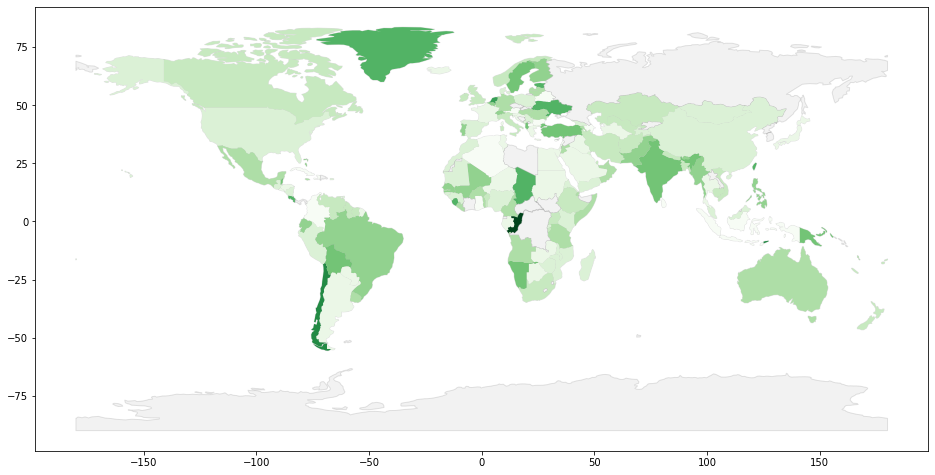

In [19]:
#  A matplotlib option 
base = world.plot(alpha=0.1, color='gray', edgecolor='black', figsize=(16,16))
fake_demo_mapped.plot(column = 'Country',cmap='Greens', legend=False, ax=base)

## M

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
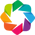

In [20]:
import cartopy.crs as crs
import geoviews as gv
import hvplot.pandas 
import holoviews as hv

gv.extension('bokeh')#, 'matplotlib')

In [21]:
#%conda list

In [22]:
choropleth = fake_demo_mapped.hvplot(geo=True, c='Country')
choropleth

:Polygons   [Longitude,Latitude]   (Country)

In [23]:
gv.tile_sources.CartoMidnight*choropleth

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (Country)

In [29]:
trio =(choropleth*\
       gv.tile_sources.ESRI*\
       df_fake.hvplot.points('Long',
                             'Lat',
                             geo=True,
                             color='randomdata',
                             cmap = 'fire',
                             alpha=0.6,       
                             tools=['hover'],
                             xlim=(-150,150),
                             ylim=(-60,90),
                             size=20))

trio.opts(height=400, width=700)



:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]   (Country)
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Long,Lat]   (randomdata)

### so fake locations and other data can be mapped in layers

Tasks: 

- How could you explore better locational data from Faker?

- Play with tile sources and look at 'gv.feature' options in place of tiles

https://ioam-docs.github.io/geoviews-master/user_guide/Projections.html

- explore tools including hover and styling points to provide more information

http://holoviews.org/user_guide/Style_Mapping.html

https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html

- try building a more complex visualization using '+' and .cols(x)

http://holoviews.org/user_guide/Composing_Elements.html


### How can you get the plots out to the world?

<details><summary>Solution</summary><br>

<h3>  one possible way is as an html file, which keeps the interactivity </h3>

```python
hvplot.save(trio, './trio.html') 
```

</details>

In [25]:
hvplot.save(trio, './trio.html')

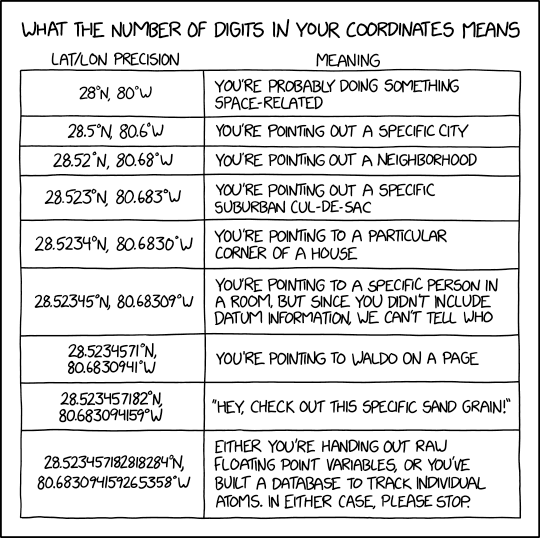

In [26]:
from IPython import display
display.Image('https://imgs.xkcd.com/comics/coordinate_precision.png')